# Libraries import

In [17]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

%matplotlib inline 
register_matplotlib_converters()

# Creating DataFrame

In [2]:
data = pd.read_csv('/content/nyc-east-river-bicycle-counts.csv')
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('Date', axis=1)
data['Day'] = data['Day'].astype(str)
data['Day'] = data['Day'].map(lambda x: x.replace(x,x[0:10]))
data = data.set_index('Day')
data = data.drop_duplicates()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 2016-04-01 to 2016-04-30
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   High Temp (°F)       30 non-null     float64
 1   Low Temp (°F)        30 non-null     float64
 2   Precipitation        30 non-null     object 
 3   Brooklyn Bridge      30 non-null     float64
 4   Manhattan Bridge     30 non-null     int64  
 5   Williamsburg Bridge  30 non-null     float64
 6   Queensboro Bridge    30 non-null     float64
 7   Total                30 non-null     int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 2.1+ KB


# Data Preprocessing

In [3]:
data['Brooklyn Bridge'] = data['Brooklyn Bridge'].astype(int)
data['Williamsburg Bridge'] = data['Williamsburg Bridge'].astype(int)
data['Queensboro Bridge'] = data['Queensboro Bridge'].astype(int)

data.head()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
Day,,,,,,,,
2016-04-01,78.1,66.0,0.01,1704,3126,4115,2552,11497
2016-04-02,55.0,48.9,0.15,827,1646,2565,1884,6922
2016-04-03,39.9,34.0,0.09,526,1232,1695,1306,4759
2016-04-04,44.1,33.1,0.47 (S),521,1067,1440,1307,4335
2016-04-05,42.1,26.1,0,1416,2617,3081,2357,9471


In [4]:
# Changing temp scale
data['High Temp (°F)'] = 5/9.0 * (data['High Temp (°F)']-32)
data['Low Temp (°F)'] = 5/9.0 * (data['Low Temp (°F)']-32)
data['High Temp (°F)'] = round(data['High Temp (°F)'],2)
data['Low Temp (°F)'] = round(data['Low Temp (°F)'],2)
data = data.rename(columns={'High Temp (°F)': 'High Temp (°C)', 'Low Temp (°F)': 'Low Temp (°C)'})
data.head()

,High Temp (°C),Low Temp (°C),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
Day,,,,,,,,
2016-04-01,25.61,18.89,0.01,1704,3126,4115,2552,11497
2016-04-02,12.78,9.39,0.15,827,1646,2565,1884,6922
2016-04-03,4.39,1.11,0.09,526,1232,1695,1306,4759
2016-04-04,6.72,0.61,0.47 (S),521,1067,1440,1307,4335
2016-04-05,5.61,-3.28,0,1416,2617,3081,2357,9471


In [6]:
# cleaning data in Precipitation's --> column of numbers
data['Precipitation'] = data['Precipitation'].replace(['T'], 0)
data['Precipitation'] = data['Precipitation'].replace(['0.47 (S)'], 0.47)
data['Precipitation'] = data['Precipitation'].astype(float)

data.head()

,High Temp (°C),Low Temp (°C),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
Day,,,,,,,,
2016-04-01,25.61,18.89,0.01,1704,3126,4115,2552,11497
2016-04-02,12.78,9.39,0.15,827,1646,2565,1884,6922
2016-04-03,4.39,1.11,0.09,526,1232,1695,1306,4759
2016-04-04,6.72,0.61,0.47,521,1067,1440,1307,4335
2016-04-05,5.61,-3.28,0.00,1416,2617,3081,2357,9471


In [8]:
data.columns

Index(['High Temp (°C)', 'Low Temp (°C)', 'Precipitation', 'Brooklyn Bridge',
       'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge',
       'Total'],
      dtype='object')

In [11]:
data['Time'] = data.index
data['Time'] = pd.to_datetime(data['Time'], errors='coerce', format='%Y-%m-%d')
data['DayOfWeek'] = data['Time'].dt.dayofweek
data['DayOfWeekName'] = data['Time'].dt.day_name()

data.head()

,DayOfWeekName,High Temp (°C),Low Temp (°C),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Time,DayOfWeek
Day,,,,,,,,,,,
2016-04-01,Friday,25.61,18.89,0.01,1704,3126,4115,2552,11497,2016-04-01,4
2016-04-02,Saturday,12.78,9.39,0.15,827,1646,2565,1884,6922,2016-04-02,5
2016-04-03,Sunday,4.39,1.11,0.09,526,1232,1695,1306,4759,2016-04-03,6
2016-04-04,Monday,6.72,0.61,0.47,521,1067,1440,1307,4335,2016-04-04,0
2016-04-05,Tuesday,5.61,-3.28,0.00,1416,2617,3081,2357,9471,2016-04-05,1


In [12]:
data = data[['DayOfWeekName', 'High Temp (°C)', 'Low Temp (°C)', 'Precipitation', 'Brooklyn Bridge',
       'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge', 'Total',
       'Time', 'DayOfWeek']]
data = data.drop('Time', axis=1)
data = data.drop('DayOfWeek', axis=1)
data.head()

,DayOfWeekName,High Temp (°C),Low Temp (°C),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
Day,,,,,,,,,
2016-04-01,Friday,25.61,18.89,0.01,1704,3126,4115,2552,11497
2016-04-02,Saturday,12.78,9.39,0.15,827,1646,2565,1884,6922
2016-04-03,Sunday,4.39,1.11,0.09,526,1232,1695,1306,4759
2016-04-04,Monday,6.72,0.61,0.47,521,1067,1440,1307,4335
2016-04-05,Tuesday,5.61,-3.28,0.00,1416,2617,3081,2357,9471


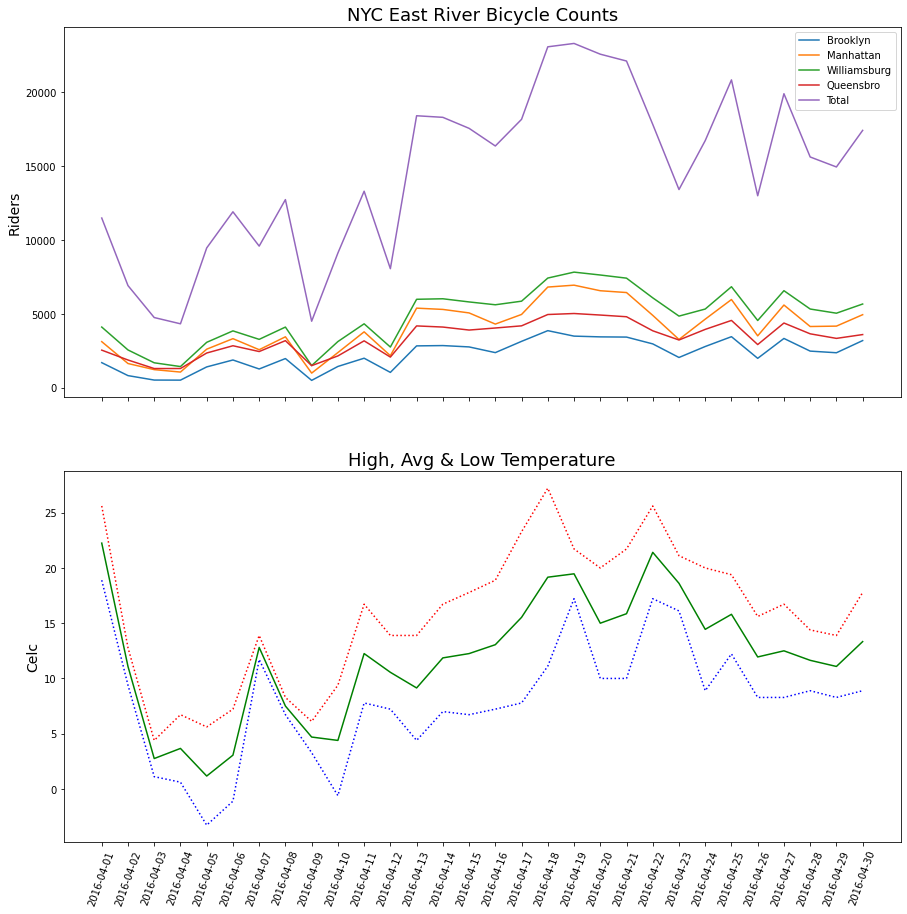

In [14]:
fig, ax=plt.subplots(2,1,figsize = (15,15))

ax[0].plot(data['Brooklyn Bridge'], label='Brooklyn')
ax[0].plot(data['Manhattan Bridge'], label='Manhattan')
ax[0].plot(data['Williamsburg Bridge'], label='Williamsburg')
ax[0].plot(data['Queensboro Bridge'], label='Queensbro')
ax[0].set_xticklabels([])
ax[0].plot(data['Total'], label='Total')
ax[0].set_ylabel("Riders", fontsize=14)
ax[0].set_title("NYC East River Bicycle Counts", fontsize=18)
ax[0].legend()

ax[1].plot(data.index, data["High Temp (°C)"], linestyle='dotted', color='r')
ax[1].plot(data.index, data["Low Temp (°C)"], linestyle='dotted', color='b')
ax[1].plot(data.index, (data["High Temp (°C)"] + data["Low Temp (°C)"])/2, color='g')
ax[1].set_title("High, Avg & Low Temperature", fontsize=18)
ax[1].set_ylabel('Celc', fontsize=14)
ax[1].xaxis.set_tick_params(rotation=70)

plt.show()

# Heatmap

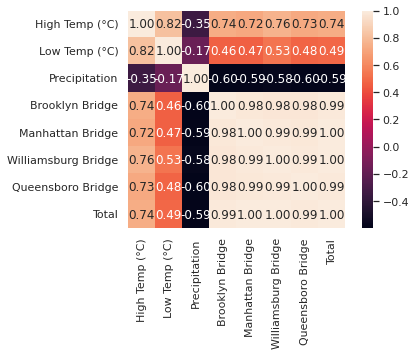

In [18]:
correlation = data.corr(method='pearson')         # korelacja metodą pearsona to zależność wyrażona
   # .corr funkcja dla szukania korelacji         # w przedziale -1 do 1. Blisko 0 brak korelacji
                                                  # blisko 1 silna korelacja 
                                                  # blisko -1 silna korelacja odwrotna (x rośnie, y maleje)
columns = correlation.index

correlation_map = np.corrcoef(data[columns].values.T)    # np.corrcoef - funkcja numpy dla wskaania korelacji pearsona, 
                                                        # w nawiasie wskazane wartości ze wszystkich kolumn + ich transformacja
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True,  # sns.heatmap - mapa ciepła, czyli przedstawienie zależności w 2D
                     square=True, fmt='.2f',                   # w nawiasie parametry różne, doczytać w dok. Seaborna
                     yticklabels = columns.values,             # ustawienie etykiet dla osi Y
                     xticklabels = columns.values)             # ustawienie etykiet dla osi X
plt.show()

# Model's training

In [19]:
X = data['High Temp (°C)']    # ustawiamy zmienne X i Y dla kolumn
Y = data['Total'].values      # najsilniej skorelowanych w Pearsonie

In [20]:
# sklearn - model_selection to proces pozwalający na wybranie właściwej "maszyny"
# dla machine learningu

# trian test split to moduł dzielący dane na podzbiory - treningowy i testowy
# można to zrobić manualnie, ale sklearn robi to randomowo dzieląc dane
from sklearn.model_selection import train_test_split   

# cross val score (kroswalidacja) to dzielenie podzbioru treningowego na podzbiory treningowy
# i walidacyjny
from sklearn.model_selection import cross_val_score

# K-Fold to Kroswalidacja K-krotna, gdzie ze zbioru treningowego, wyodrębnia się zbiór walidacyjny
# k-krotnie i przeprowdza 'k' prób
from sklearn.model_selection import KFold

# StandardScaler - funkcja służąca standaryzacji danych czyli odjęciu od każdej danej średniej i podzieleniu przez stdev
# to sprawia, że dane są przeskalowane
from sklearn.preprocessing import StandardScaler

In [21]:
# poniżej ustawienie zmiennych dla grup treningowych i testowych
# test_size określa grupe testową na poziomie 20% danych
# a random_state = 42 powoduje że randomowy podział zostaje zapamiętany 
# na przyszłość, dane nie przemieszają się przy kolejnym odpalaniu kodu
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [22]:
# moduł dla Regresji Liniowej
from sklearn.linear_model import LinearRegression

# moduł dla Regresji Drzewa Decyzyjnego
from sklearn.tree import DecisionTreeRegressor

In [23]:
kfold = KFold(n_splits=10, random_state=21, shuffle=True)
# robimy kroswalidację modelu regresji liniowej 
# cv_results przechowuje wyniki 10 iteracji walidacji krzyżowej
# czyli otrzymujemy 10 błędów modeli regresji liniowej dla danego podziału na zbiór treningowy i testowy
cv_results = cross_val_score(LinearRegression(),
                             X_train.values.reshape(-1,1), 
                             Y_train,
                             cv=kfold,
                             scoring='neg_mean_squared_error')
print('LinearRegressor cv score: ', cv_results.mean(), cv_results.std())

LinearRegressor cv score:  -21673291.88585537 14710956.2801088


In [25]:
cv_results = cross_val_score(DecisionTreeRegressor(),
                             X_train.values.reshape(-1,1), 
                             Y_train,
                             cv=kfold,
                             scoring='neg_mean_squared_error')
print('DecisionTreeRegressor cv score: ', cv_results.mean(), cv_results.std())

DecisionTreeRegressor cv score:  -28047910.85787037 14896693.788091056


# Result: LinearRegressor present better prediction's score